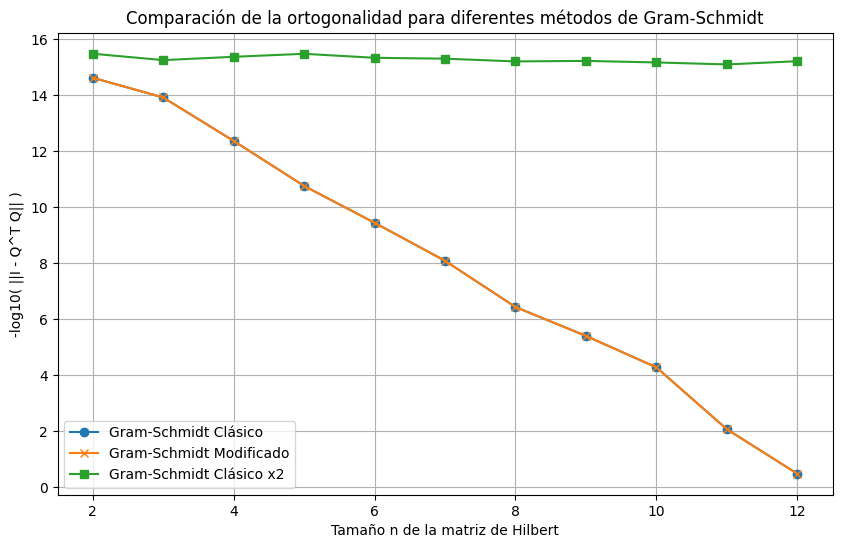

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generación de la matriz de Hilbert
def hilbert_matrix(n):
    """Genera la matriz de Hilbert de tamaño n x n"""
    return np.array([[1.0 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

# 2. Implementación del método de Gram-Schmidt Clásico
def gram_schmidt_classic(A):
    """Implementación del método clásico de Gram-Schmidt"""
    n = A.shape[1]
    Q = np.zeros_like(A)

    for k in range(n):
        v = A[:, k]
        for j in range(k):
            proj = np.dot(Q[:, j], v) * Q[:, j]
            v = v - proj
        Q[:, k] = v / np.linalg.norm(v)

    return Q

# 3. Implementación del método de Gram-Schmidt Modificado
def gram_schmidt_modified(A):
    """Implementación del método modificado de Gram-Schmidt"""
    m, n = A.shape
    Q = np.zeros_like(A)

    for k in range(n):
        Q[:, k] = A[:, k]
        for j in range(k):
            proj = np.dot(Q[:, j], Q[:, k]) * Q[:, j]
            Q[:, k] = Q[:, k] - proj
        Q[:, k] /= np.linalg.norm(Q[:, k])

    return Q

# 4. Medir la ortogonalidad de la matriz Q (norma de I - Q^T Q)
def measure_orthogonality(Q):
    """Mide la ortogonalidad de la matriz Q"""
    I_minus_QtQ = np.linalg.norm(np.eye(Q.shape[1]) - np.dot(Q.T, Q))
    return -np.log10(I_minus_QtQ)

# 5. Realizar experimentos con diferentes tamaños de la matriz de Hilbert
n_values = range(2, 13)  # Tamaños de n de 2 a 12
orthogonality_classic = []
orthogonality_modified = []
orthogonality_double_classic = []

for n in n_values:
    # Generar la matriz de Hilbert
    H = hilbert_matrix(n)

    # Método clásico de Gram-Schmidt
    Q_classic = gram_schmidt_classic(H)
    orthogonality_classic.append(measure_orthogonality(Q_classic))

    # Método modificado de Gram-Schmidt
    Q_modified = gram_schmidt_modified(H)
    orthogonality_modified.append(measure_orthogonality(Q_modified))

    # Aplicar el método clásico dos veces sobre la matriz Q obtenida
    Q_double_classic = gram_schmidt_classic(Q_classic)
    orthogonality_double_classic.append(measure_orthogonality(Q_double_classic))

# 6. Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_values, orthogonality_classic, label="Gram-Schmidt Clásico", marker='o')
plt.plot(n_values, orthogonality_modified, label="Gram-Schmidt Modificado", marker='x')
plt.plot(n_values, orthogonality_double_classic, label="Gram-Schmidt Clásico x2", marker='s')
plt.xlabel('Tamaño n de la matriz de Hilbert')
plt.ylabel('-log10( ||I - Q^T Q|| )')
plt.legend()
plt.title('Comparación de la ortogonalidad para diferentes métodos de Gram-Schmidt')
plt.grid(True)
plt.show()



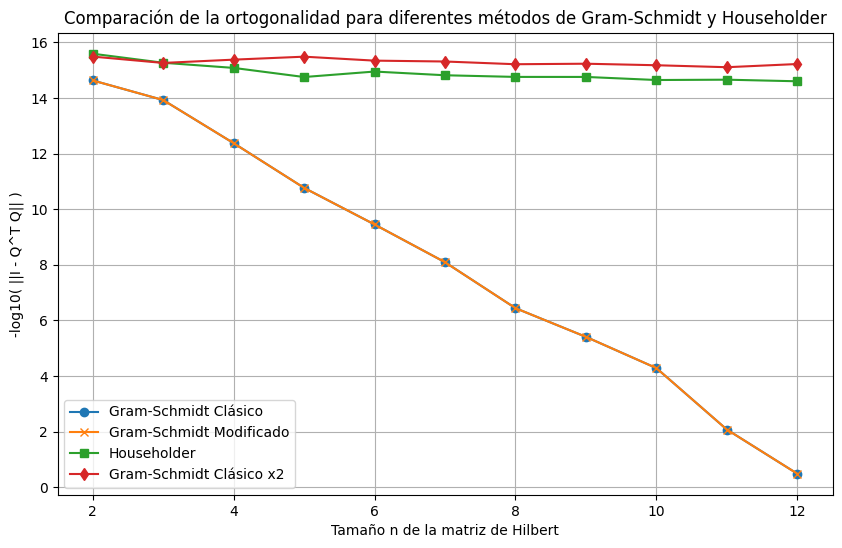

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generación de la matriz de Hilbert
def hilbert_matrix(n):
    """Genera la matriz de Hilbert de tamaño n x n"""
    return np.array([[1.0 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

# 2. Implementación de la factorización de Householder
def householder_decomposition(A):
    """Factoriza A usando la descomposición de Householder A = QR"""
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for k in range(n):
        # Crear el vector x y su reflección
        x = R[k:m, k]
        e1 = np.zeros_like(x)
        e1[0] = np.linalg.norm(x) * np.sign(x[0])  # El primer elemento de x
        v = x + e1
        v = v / np.linalg.norm(v)  # Normalización del vector de Householder

        # Matriz de Householder
        H_k = np.eye(m - k) - 2 * np.outer(v, v)

        # Aplicar la transformación de Householder
        # Para actualizar la submatriz R
        R[k:m, k:n] = H_k @ R[k:m, k:n]

        # Para actualizar Q, aplicamos H_k de manera adecuada
        Q[k:m, :] = H_k @ Q[k:m, :]

    return Q, R

# 3. Medir la ortogonalidad de la matriz Q
def measure_orthogonality(Q):
    """Mide la ortogonalidad de la matriz Q"""
    I_minus_QtQ = np.linalg.norm(np.eye(Q.shape[1]) - np.dot(Q.T, Q))
    return -np.log10(I_minus_QtQ)

# 4. Realizar experimentos con diferentes tamaños de la matriz de Hilbert
n_values = range(2, 13)  # Tamaños de n de 2 a 12
orthogonality_classic = []
orthogonality_modified = []
orthogonality_householder = []
orthogonality_double_classic = []

for n in n_values:
    # Generar la matriz de Hilbert
    H = hilbert_matrix(n)

    # Método clásico de Gram-Schmidt
    Q_classic = gram_schmidt_classic(H)
    orthogonality_classic.append(measure_orthogonality(Q_classic))

    # Método modificado de Gram-Schmidt
    Q_modified = gram_schmidt_modified(H)
    orthogonality_modified.append(measure_orthogonality(Q_modified))

    # Factorización de Householder
    Q_householder, R_householder = householder_decomposition(H)
    orthogonality_householder.append(measure_orthogonality(Q_householder))

    # Aplicar el método clásico dos veces sobre la matriz Q obtenida
    Q_double_classic = gram_schmidt_classic(Q_classic)
    orthogonality_double_classic.append(measure_orthogonality(Q_double_classic))

# 5. Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_values, orthogonality_classic, label="Gram-Schmidt Clásico", marker='o')
plt.plot(n_values, orthogonality_modified, label="Gram-Schmidt Modificado", marker='x')
plt.plot(n_values, orthogonality_householder, label="Householder", marker='s')
plt.plot(n_values, orthogonality_double_classic, label="Gram-Schmidt Clásico x2", marker='d')
plt.xlabel('Tamaño n de la matriz de Hilbert')
plt.ylabel('-log10( ||I - Q^T Q|| )')
plt.legend()
plt.title('Comparación de la ortogonalidad para diferentes métodos de Gram-Schmidt y Householder')
plt.grid(True)
plt.show()




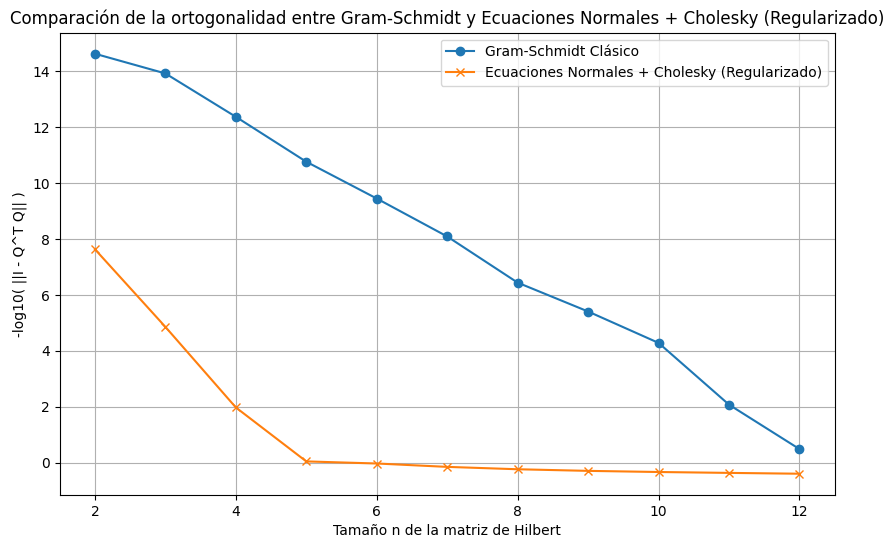

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generación de la matriz de Hilbert
def hilbert_matrix(n):
    """Genera la matriz de Hilbert de tamaño n x n"""
    return np.array([[1.0 / (i + j - 1) for j in range(1, n + 1)] for i in range(1, n + 1)])

# 2. Implementación del método de Gram-Schmidt Clásico
def gram_schmidt_classic(A):
    """Implementación del método clásico de Gram-Schmidt"""
    n = A.shape[1]
    Q = np.zeros_like(A)

    for k in range(n):
        v = A[:, k]
        for j in range(k):
            proj = np.dot(Q[:, j], v) * Q[:, j]
            v = v - proj
        Q[:, k] = v / np.linalg.norm(v)

    return Q

# 3. Implementación de la factorización de Cholesky con regularización
def cholesky_method(A, regularization_factor=1e-10):
    """Calcula la base ortogonal Q usando las ecuaciones normales y la factorización de Cholesky"""
    AtA = np.dot(A.T, A)  # Matriz de las ecuaciones normales

    # Regularización: agregar un pequeño valor a la diagonal de AtA
    AtA += np.eye(AtA.shape[0]) * regularization_factor  # Asegura que AtA sea positiva definida

    try:
        L = np.linalg.cholesky(AtA)  # Factorización de Cholesky
    except np.linalg.LinAlgError:
        raise ValueError("La matriz A^T A no es positiva definida, incluso con regularización.")

    L_inv_T = np.linalg.inv(L.T)  # Inversa de la transpuesta de L
    Q = np.dot(A, L_inv_T)  # Q = A * L^(-T)
    return Q

# 4. Medir la ortogonalidad de la matriz Q
def measure_orthogonality(Q):
    """Mide la ortogonalidad de la matriz Q"""
    I_minus_QtQ = np.linalg.norm(np.eye(Q.shape[1]) - np.dot(Q.T, Q))
    return -np.log10(I_minus_QtQ)

# 5. Realizar experimentos con diferentes tamaños de la matriz de Hilbert
n_values = range(2, 13)  # Tamaños de n de 2 a 12
orthogonality_classic = []
orthogonality_cholesky = []

for n in n_values:
    # Generar la matriz de Hilbert
    H = hilbert_matrix(n)

    # Método clásico de Gram-Schmidt
    Q_classic = gram_schmidt_classic(H)
    orthogonality_classic.append(measure_orthogonality(Q_classic))

    # Método usando las ecuaciones normales y Cholesky
    try:
        Q_cholesky = cholesky_method(H)
        orthogonality_cholesky.append(measure_orthogonality(Q_cholesky))
    except ValueError as e:
        print(f"Error en la factorización de Cholesky para n={n}: {e}")
        orthogonality_cholesky.append(np.nan)  # Si hay error, agregar NaN para esa n

# 6. Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_values, orthogonality_classic, label="Gram-Schmidt Clásico", marker='o')
plt.plot(n_values, orthogonality_cholesky, label="Ecuaciones Normales + Cholesky (Regularizado)", marker='x')
plt.xlabel('Tamaño n de la matriz de Hilbert')
plt.ylabel('-log10( ||I - Q^T Q|| )')
plt.legend()
plt.title('Comparación de la ortogonalidad entre Gram-Schmidt y Ecuaciones Normales + Cholesky (Regularizado)')
plt.grid(True)
plt.show()



Si buscas precisión y estabilidad, especialmente con matrices mal condicionadas, los métodos de Householder y Ecuaciones Normales + Cholesky son los más recomendables. Estos métodos ofrecen un alto grado de ortogonalidad y son robustos frente a errores numéricos.

Si necesitas rapidez y simplicidad, y estás trabajando con matrices bien condicionadas, el método de Gram-Schmidt clásico es adecuado, pero sufre en cuanto a precisión y estabilidad cuando la matriz se vuelve mal condicionada.

Por lo tanto, la calidad de los resultados obtenidos depende del equilibrio entre precisión (ortogonalidad), estabilidad numérica y rendimiento computacional. Para matrices mal condicionadas como las de Hilbert, es preferible utilizar los métodos más estables como Householder o Ecuaciones Normales + Cholesky.